In [2]:
import pandas as pd
import numpy as np
import re


In [3]:
imdb_df = pd.read_csv("imdb_top_1000.csv")

imdb_df.head()

,Unnamed: 0,star_rating,title,content_rating,genre,duration
0,0,9.3,The Shawshank Redemption,R,Crime,142
1,1,9.2,The Godfather,R,Crime,175
2,2,9.1,The Godfather: Part II,R,Crime,200
3,3,9.0,The Dark Knight,PG-13,Action,152
4,4,8.9,Pulp Fiction,R,Crime,154


Filter to Action; sort by duration desc; convert to hours; take 4th.

In [4]:
action = imdb_df[imdb_df["genre"] == "Action"]
action_sorted = action.sort_values("duration", ascending=False)
action_sorted["duration_hr"] = action_sorted["duration"] / 60
action_sorted.iloc[3]["duration_hr"]

print(action_sorted)
print(action_sorted.iloc[3]["duration_hr"])

     Unnamed: 0  star_rating                            title content_rating   genre  duration  duration_hr
767         767          7.6  It's a Mad, Mad, Mad, Mad World       APPROVED  Action       205     3.416667
385         385          8.0                        Spartacus          PG-13  Action       197     3.283333
671         671          7.7                       Grindhouse              R  Action       191     3.183333
534         534          7.8                  The Longest Day              G  Action       178     2.966667
82           82          8.4                       Braveheart              R  Action       177     2.950000
..          ...          ...                              ...            ...     ...       ...          ...
744         744          7.6      Mad Max 2: The Road Warrior              R  Action        94     1.566667
685         685          7.7                      First Blood              R  Action        93     1.550000
455         455          7.9

What is the IMDb rating of the second shortest Comedy?

In [5]:
com = imdb_df[imdb_df["genre"] == "Comedy"].sort_values("duration")
com.iloc[1]["star_rating"]

print(com.head())
print(com.iloc[1]["star_rating"])

     Unnamed: 0  star_rating             title content_rating   genre  duration
88           88          8.4           The Kid      NOT RATED  Comedy        68
293         293          8.1         Duck Soup         PASSED  Comedy        68
535         535          7.8             Zelig             PG  Comedy        79
622         622          7.7   The Dinner Game          PG-13  Comedy        80
738         738          7.6  Army of Darkness              R  Comedy        81
8.1


Which movie title has the highest rating among PG-13 films?

In [6]:
pg13 = imdb_df[imdb_df["content_rating"] == "PG-13"]
pg13.loc[pg13["star_rating"].idxmax(), "title"]


'The Dark Knight'

Among R-rated movies, what is the title of the longest one?

In [7]:
r = imdb_df[imdb_df["content_rating"] == "R"]
r.loc[r["duration"].idxmax(), "title"]


'Once Upon a Time in America'

Which genre has the highest average rating among PG-13 movies?

In [8]:
pg13 = imdb_df[imdb_df["content_rating"] == "PG-13"]
pg13.groupby("genre")["star_rating"].mean().sort_values(ascending=False).head(1)


genre
Western    8.6
Name: star_rating, dtype: float64

Which content rating has the longest average duration?

In [9]:
imdb_df.groupby("content_rating")["duration"].mean().sort_values(ascending=False).head(1)


content_rating
GP    135.666667
Name: duration, dtype: float64

Within Drama, which content rating has the highest average rating?

In [10]:
drama = imdb_df[imdb_df["genre"] == "Drama"]
drama.groupby("content_rating")["star_rating"].mean().sort_values(ascending=False).head(1)


content_rating
PASSED    8.2
Name: star_rating, dtype: float64

For each genre, how many movies with rating ≥ 8.5 are there? Return the top 3 genres.


In [11]:
high = imdb_df[imdb_df["star_rating"] >= 8.5]
high.groupby("genre").size().sort_values(ascending=False).head(3)


genre
Drama     17
Action    10
Crime     10
dtype: int64

How many movies contain the word “Love” in their title? (case-insensitive)

In [12]:
imdb_df["title"].str.contains("Love", case=False, na=False).sum()


np.int64(7)

List the first 5 titles that contain a number (e.g., “2001”).

In [13]:
with_num = imdb_df[imdb_df["title"].str.contains(r"\d", na=False)]
with_num["title"].head(5)


5                   12 Angry Men
24                         Se7en
45    Terminator 2: Judgment Day
60                      3 Idiots
81                   Toy Story 3
Name: title, dtype: object

How many titles start with the word “The”?

In [14]:
imdb_df["title"].str.match(r"^The\b", case=False).sum()


np.int64(222)

How many titles are longer than 20 characters?

In [15]:
(imdb_df["title"].str.len() > 20).sum()


np.int64(199)

Given this code, build the DataFrame so it runs:

In [16]:
imdb_scores = imdb_df.melt(
        value_vars=["star_rating", "duration"],
        var_name="measure", value_name="score"
).dropna()

print(imdb_scores)

          measure  score
0     star_rating    9.3
1     star_rating    9.2
2     star_rating    9.1
3     star_rating    9.0
4     star_rating    8.9
...           ...    ...
1953     duration  116.0
1954     duration  118.0
1955     duration  138.0
1956     duration  114.0
1957     duration  126.0

[1958 rows x 2 columns]


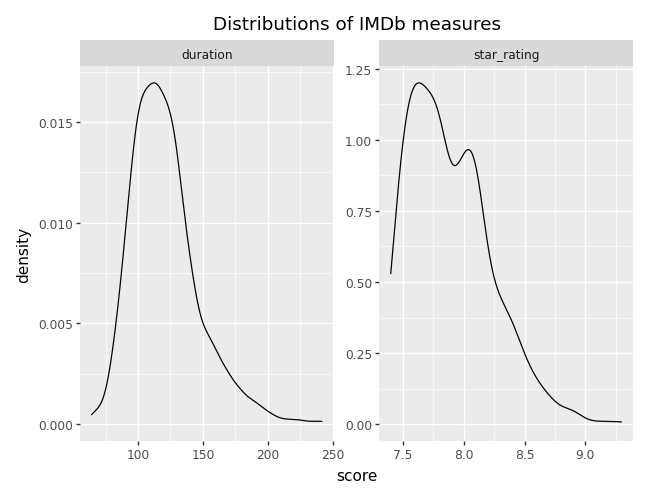

In [17]:
from plotnine import ggplot, aes, geom_density, facet_wrap, ggtitle
(ggplot(imdb_scores, aes(x="score"))
        + geom_density()
        + facet_wrap('~ measure', scales='free')
        + ggtitle("Distributions of IMDb measures")
)


C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\stats\stat_density.py:179: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\stats\stat_density.py:184: PlotnineWarning: Groups with fewer than 2 data points have been removed.


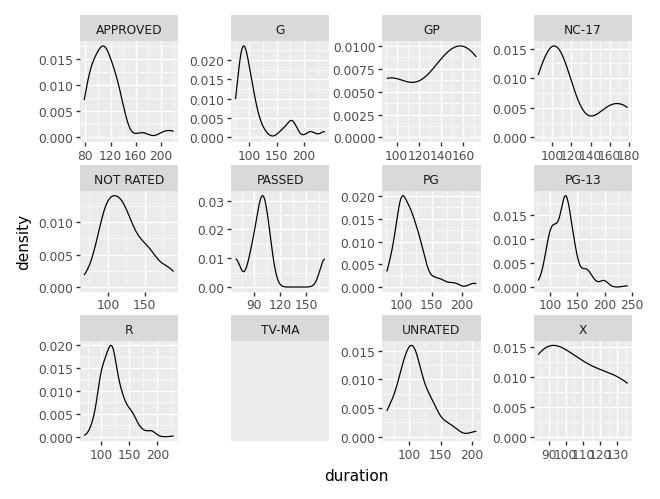

In [18]:
imdb_scores = imdb_df[["content_rating", "duration"]].dropna()

(ggplot(imdb_scores, aes(x="duration")) 
        + geom_density() 
        + facet_wrap("~ content_rating", scales="free")
)

1.5A — Boxplots of reviews per group (parallel to the parks example)


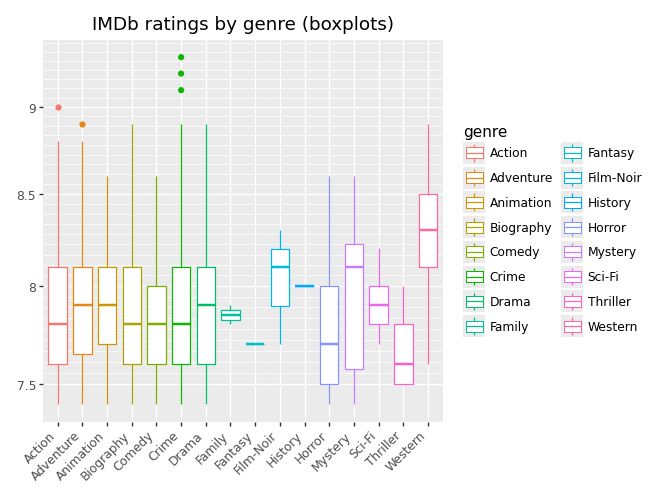

In [19]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text
from plotnine.scales import scale_y_log10, scale_color_discrete

(ggplot(imdb_df, aes(x="genre", y="star_rating", color="genre"))
 + geom_boxplot()
 + scale_y_log10()              # if treating rating-like counts; otherwise drop log
 + scale_color_discrete()
 + labs(x="", y="", title="IMDb ratings by genre (boxplots)")
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
)


1.5A — Boxplots of reviews per group (parallel to the parks example)

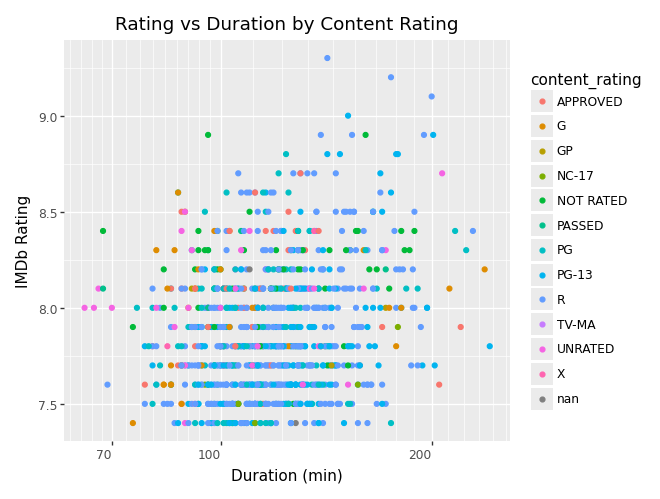

In [20]:
from plotnine import ggplot, aes, geom_point, labs, theme, element_text
from plotnine.scales import scale_x_log10, scale_color_discrete

(ggplot(imdb_df, aes(x="duration", y="star_rating", color="content_rating"))
 + geom_point()
 + scale_x_log10()
 + scale_color_discrete()
 + labs(x="Duration (min)", y="IMDb Rating", title="Rating vs Duration by Content Rating")
 + theme(axis_text_x=element_text(rotation=0, hjust=1))
)


1.5C — Bars with error bars (mean rating per content rating)

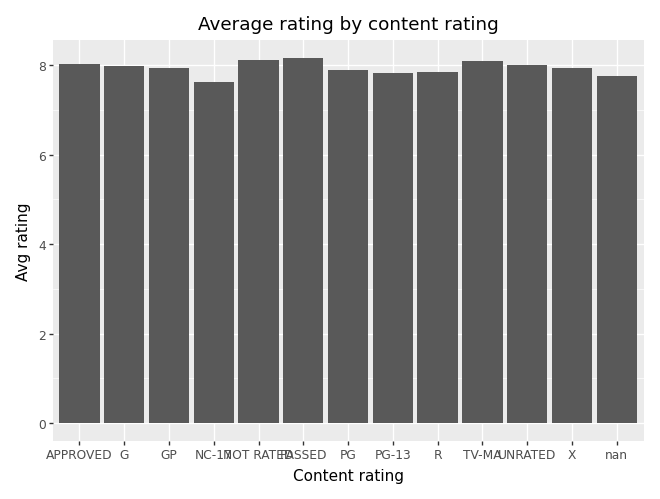

In [21]:
from plotnine import ggplot, aes, geom_bar, labs, coord_flip
(ggplot(imdb_df, aes(x="content_rating", y="star_rating"))
 + geom_bar(stat="summary", fun_data="mean_cl_boot")
 + labs(x="Content rating", y="Avg rating", title="Average rating by content rating")
)


Write a function to recommend movies by genre, with optional filters for:

min_rating, max_duration, content (content rating)

In [22]:
def recommend_movies(dataset, genre, min_rating=None, max_duration=None, content=None):
    df = dataset[dataset["genre"] == genre]
    if min_rating is not None:
        df = df[df["star_rating"] >= min_rating]
    if max_duration is not None:
        df = df[df["duration"] <= max_duration]
    if content is not None:
        df = df[df["content_rating"] == content]
    return df[["title", "genre", "star_rating", "duration", "content_rating"]]

# Example call:
recommend_movies(imdb_df, "Drama", min_rating=8.4, max_duration=140, content="PG-13")


,title,genre,star_rating,duration,content_rating
53,The Prestige,Drama,8.5,130,PG-13
73,Jodaeiye Nader az Simin,Drama,8.4,123,PG-13


Scrape IMDb genres and short blurbs from
https://www.imdb.com/feature/genre/ and return a DataFrame (genre, description).

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_genres():
    my_url = "https://www.imdb.com/feature/genre/"
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/127.0.0.0 Safari/537.36"
        ),
        "Accept-Language": "en-US,en;q=0.9",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        "Referer": "https://www.imdb.com/",
        }
    response = requests.get(my_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    names, descs = [], []
    for a in soup.select(".image-list a"):
        names.append(a.text.strip())
        descs.append(a.get("title", "").strip())
    return pd.DataFrame({"genre": names, "description": descs})

# Example call:
scrape_genres()


,genre,description


I want movies that are:

Under 120 minutes,

Rated at least 8.8,

Not R-rated.

Use recommend_movies to find candidates for two genres of your choice.

Use scrape_genres() to collect genre descriptions.

Merge the recommendations with the genre info so I can read a short description next to each recommended film.

In [24]:
cand1 = recommend_movies(imdb_df, "Comedy", min_rating=8.0, max_duration=120, content="PG-13")
cand2 = recommend_movies(imdb_df, "Drama",  min_rating=7.9, max_duration=120, content="PG-13")
recs = pd.concat([cand1, cand2], ignore_index=True)

ginfo = scrape_genres()
out = recs.merge(ginfo, on="genre", how="left")
out


,title,genre,star_rating,duration,content_rating,description
0,Life Is Beautiful,Comedy,8.6,116,PG-13,NaN
1,Crimes and Misdemeanors,Comedy,8.0,104,PG-13,NaN
2,The Artist,Comedy,8.0,100,PG-13,NaN
3,Hannah and Her Sisters,Comedy,8.0,103,PG-13,NaN
4,The Sixth Sense,Drama,8.2,107,PG-13,NaN
5,Chungking Express,Drama,8.1,98,PG-13,NaN
6,The Perks of Being a Wallflower,Drama,8.1,102,PG-13,NaN
7,Edward Scissorhands,Drama,8.0,105,PG-13,NaN
8,The Chorus,Drama,7.9,97,PG-13,NaN


C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\themes\themeable.py:2486: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


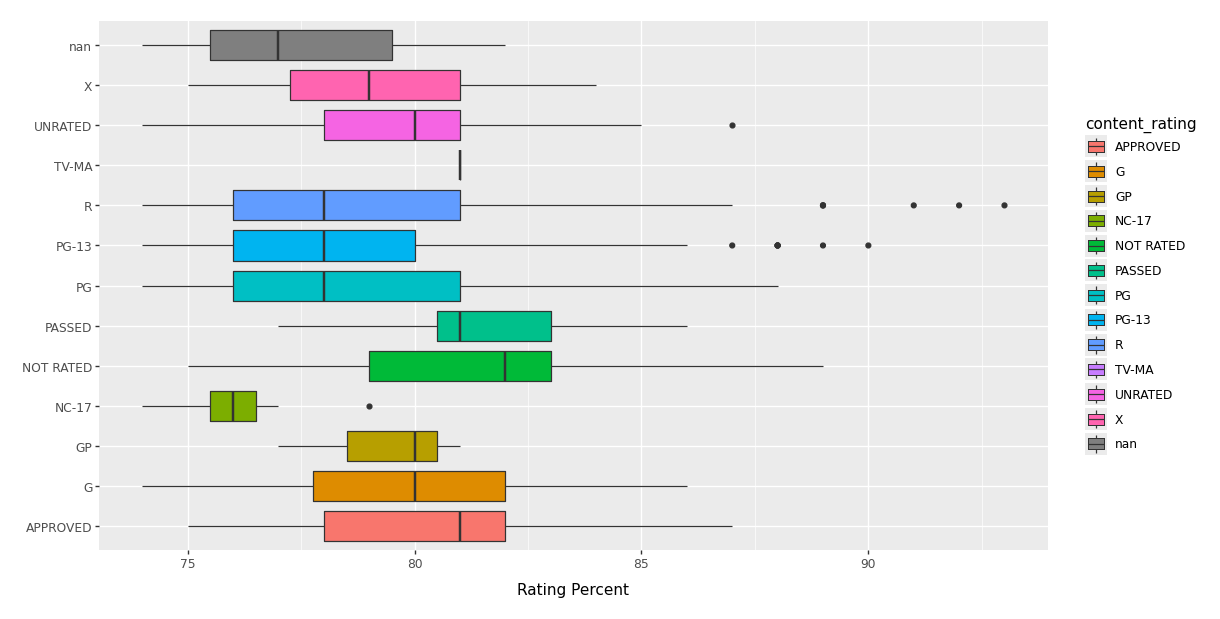

In [40]:
from plotnine import (
    ggplot, aes, geom_boxplot, coord_flip,
    scale_y_continuous, theme, labs, scale_x_continuous
)

# Make sure it's numeric
imdb_df["rating_percent"] = imdb_df["star_rating"].astype(float) * 10

plot1 = (
    ggplot(imdb_df, aes(x="content_rating", y="rating_percent", fill="content_rating"))
    + geom_boxplot()
    + coord_flip()
#     + scale_y_continuous(breaks=[50, 100, 150, 200], expand=(0.02, 0))
    + labs(x="", y="Rating Percent")
    + theme(
        figure_size=(12, 6),
        subplots_adjust={'bottom': 0.25, 'left': 0.15},  # more space for labels
    )
)
plot1
